In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cas = pd.read_csv('./baze/manjse/Cas.csv')
cesta = pd.read_csv('./baze/manjse/Cesta.csv')
faktor_cest = pd.read_csv('./baze/manjse/FaktorCest.csv')
faktor_oseb = pd.read_csv('./baze/manjse/FaktorOseb.csv')
koordinate = pd.read_csv('./baze/manjse/Koordinate.csv')
kraj = pd.read_csv('./baze/manjse/Kraj.csv')
nesreca = pd.read_csv('./baze/manjse/Nesreca.csv')
osebe = pd.read_csv('./baze/manjse/Osebe.csv')
splosno = pd.read_csv('./baze/manjse/Splosno.csv')

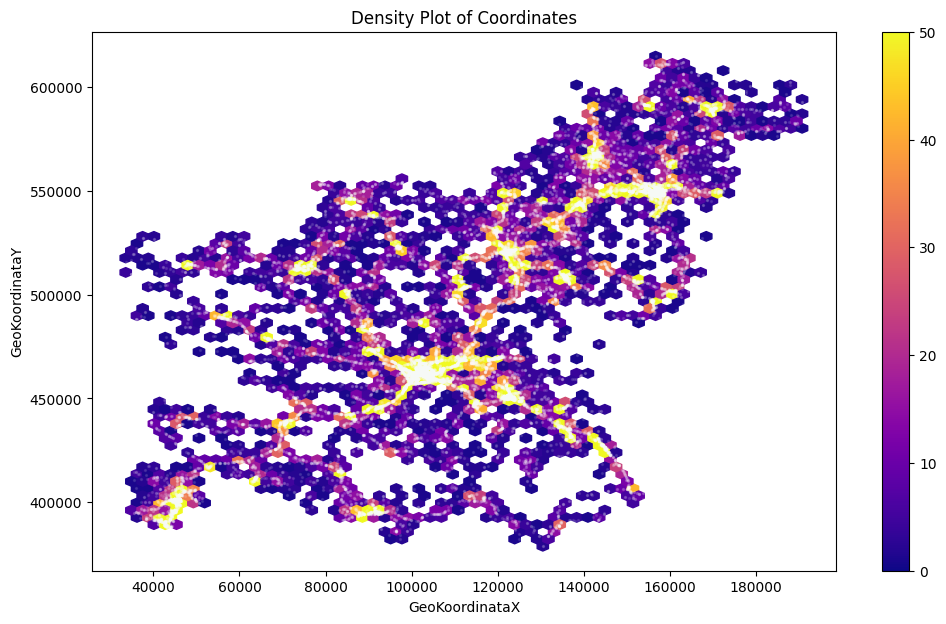

In [179]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

img = plt.imread('Slovenija.png')

colors = ['#114477', '#55aa77', '#ffee44']
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors, N=256)

fig, ax = plt.subplots(figsize=(12, 7))
# add scatter plot to display on top of the image
ax.scatter(x=koordinate['GeoKoordinataX'], y=koordinate['GeoKoordinataY'], s=2, alpha=0.1, color='white', zorder=3)
# add hexbin plot
hb = ax.hexbin(x=koordinate['GeoKoordinataX'], y=koordinate['GeoKoordinataY'], gridsize=60, cmap='plasma', mincnt=1, vmin=0, vmax=50)
#ax.imshow(img, aspect='auto', alpha=0.5, zorder=0)

ax.set_title('Density Plot of Coordinates')
ax.set_xlabel('GeoKoordinataX')
ax.set_ylabel('GeoKoordinataY')
plt.colorbar(hb)

plt.show()


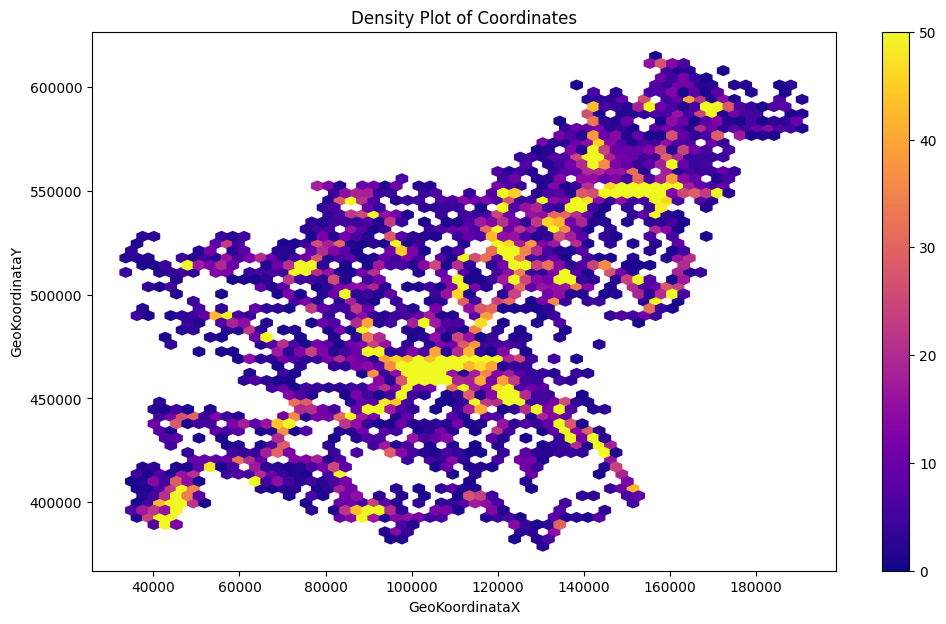

In [156]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))
hb = ax.hexbin(x=koordinate['GeoKoordinataX'], y=koordinate['GeoKoordinataY'], gridsize=60, cmap='plasma', mincnt=1, vmin=0, vmax=50, zorder=2)

ax.set_title('Density Plot of Coordinates')
ax.set_xlabel('GeoKoordinataX')
ax.set_ylabel('GeoKoordinataY')
plt.colorbar(hb)

plt.show()

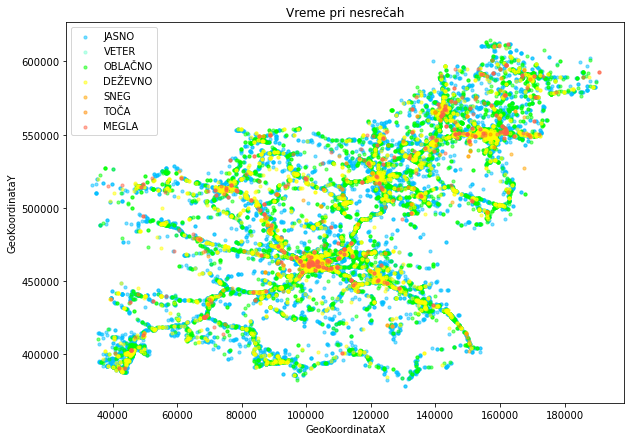

In [30]:
vreme = faktor_cest.drop(faktor_cest[(faktor_cest["VremenskeOkoliscine"] == "NEZNANO")].index)
vrste_vremen = vreme["VremenskeOkoliscine"].unique()
# print(vrste_vremen)

merged_df = pd.merge(vreme, koordinate, on="ZaporednaStevilkaOsebeVPN")
vreme_df = merged_df[['GeoKoordinataX', 'GeoKoordinataY', 'VremenskeOkoliscine']]
# print(vreme_df)

vreme_df = vreme_df.dropna().copy()

vrste_vremen_id = {'JASNO': 0,
                   'VETER': 1,
                   'OBLAČNO': 2,
                   'DEŽEVNO': 3,
                   'SNEG': 4,
                   'TOČA': 5,
                   'MEGLA': 6}

vreme_df.loc[:, 'VremenskeOkoliscine'] = vreme_df['VremenskeOkoliscine'].map(vrste_vremen_id)


colors = ["deepskyblue", "aquamarine", "lime", "yellow", "orange", "darkorange", "tomato"]

fig, ax = plt.subplots(figsize=(10, 7))

for i, vreme_id in enumerate(sorted(vreme_df['VremenskeOkoliscine'].unique())):
    subset = vreme_df[vreme_df['VremenskeOkoliscine'] == vreme_id]
    alpha = 0.5
    
    ax.scatter(subset['GeoKoordinataX'], subset['GeoKoordinataY'], s=10, alpha=alpha, c=colors[i],
               label=[i for i in vrste_vremen_id if vrste_vremen_id[i]==vreme_id][0])

ax.set_title('Vreme pri nesrečah')
ax.set_xlabel('GeoKoordinataX')
ax.set_ylabel('GeoKoordinataY')
ax.legend()
plt.show()